In [97]:
%matplotlib inline
from pathlib import Path

import numpy as np

from spectrometer import FID1D, plot, process

In [98]:
# Load raw *.fid data
file = Path(
    "../data/20230822-123341-Water-1H-spin_echo,length=8us,delay_tau=100000us,record_length=20000.0,sample_rate=320000.0,probe=andrew.fid"
)
fid = FID1D.from_file(file)

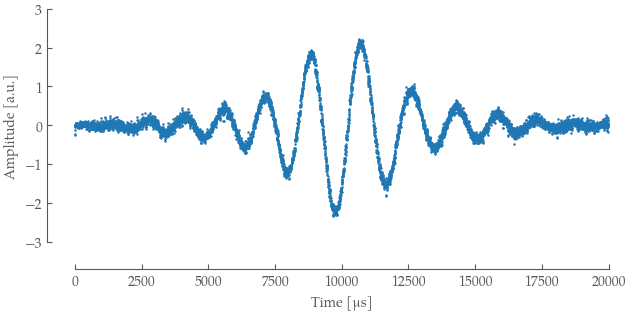

In [99]:
# Plot raw data
cm = 1 / 2.54
fig, axes = plot.subplots(
    figsize=(16.0 * cm, 8.0 * cm),  # Wide Layout: ~16cm, Margin Layout: 10.7cm
)
axes.plot(
    fid.us_scale,
    fid.data.real,
    linestyle="",
    marker="o",
    markersize=0.8,
)
axes.set_ylabel("Amplitude [a.u.]")
axes.set_xlabel("Time [μs]")

plot.format_axes(axes)

fig.savefig("spin_echo_raw.pdf")

Phase Shift: -17.12597656250002


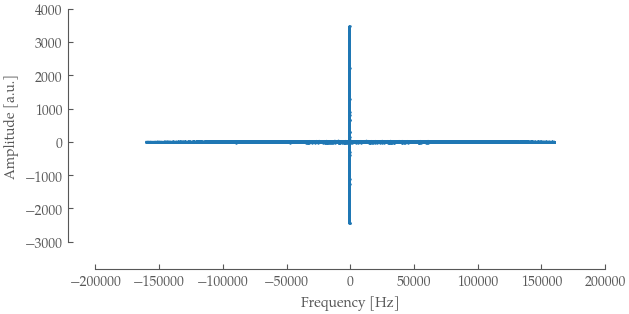

In [100]:
# Fourier Transform
hz_scale, fft_vals, p0 = fid.simple_fft()
peak = np.argmax(np.abs(fft_vals))
peak_hz_scale = hz_scale  # [peak-100:peak+100]
peak_fft_vals = fft_vals  # [peak-100:peak+100]
print(f"Phase Shift: {p0}")

# Plot Fourier Transform
cm = 1 / 2.54
fig, axes = plot.subplots(
    figsize=(16.0 * cm, 8.0 * cm),  # Wide Layout: ~16cm, Margin Layout: 10.7cm
)
axes.plot(
    peak_hz_scale,
    peak_fft_vals.real,
    # linestyle="",
    marker="o",
    markersize=0.8,
)
axes.set_ylabel("Amplitude [a.u.]")
axes.set_xlabel("Frequency [Hz]")

plot.format_axes(axes)

fig.savefig("spin_echo_fft_raw.pdf")